In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warnings'

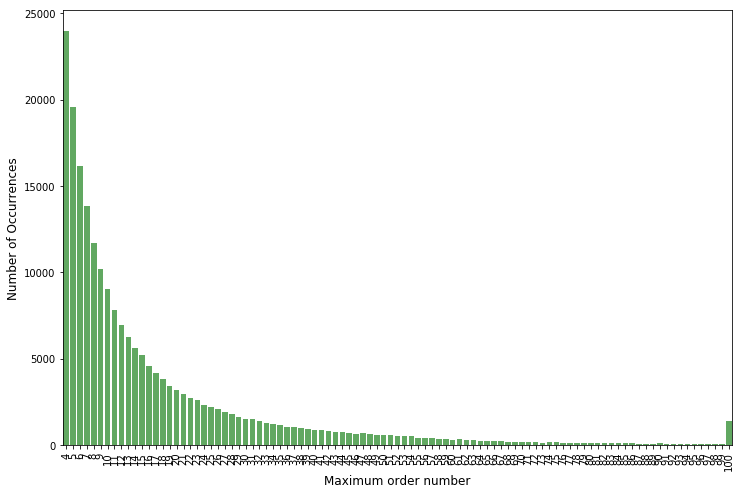

In [4]:
cnt_ord = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_ord = cnt_ord.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_ord.index, cnt_ord.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max capped at 100. 

Now let us see how the ordering habit changes with day of week.

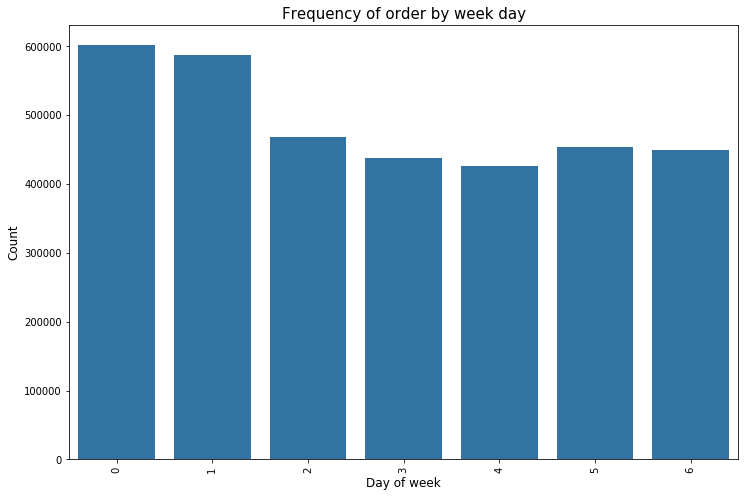

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 are Saturday and Sunday when the orders are high and low during Wednesday.

Now we will see how the distribution is with respect to time of the day.

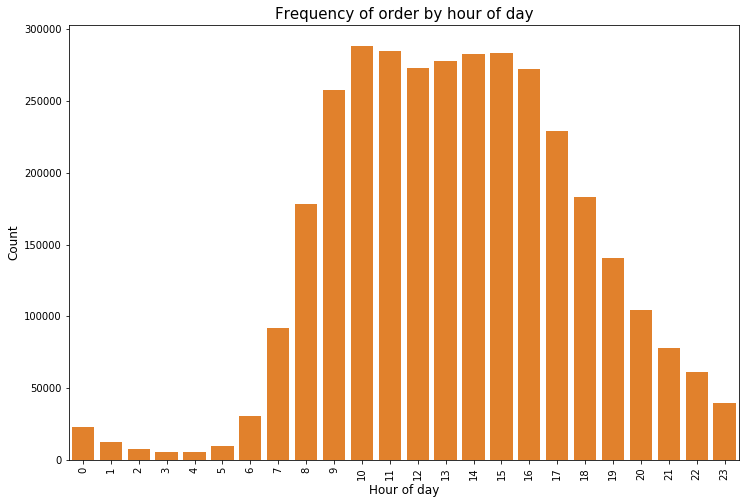

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during day time. 

Now let us combine the day of week and hour of day to see the distribution.

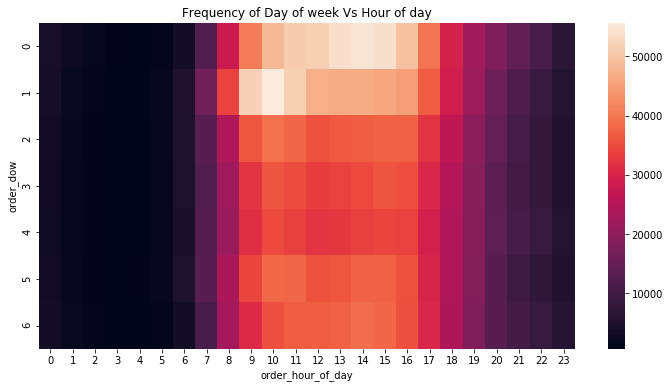

In [7]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

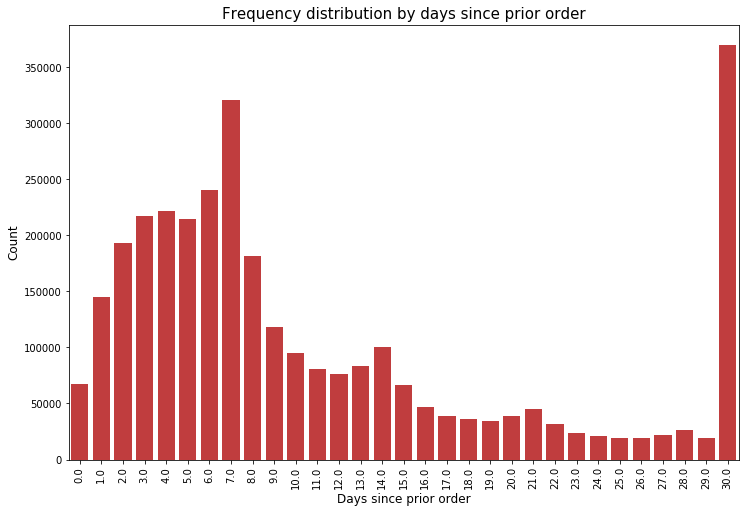

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Now let us merge products,department,aisles with prior

In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
prior = pd.merge(prior, products, on='product_id', how='left')
prior = pd.merge(prior, aisles, on='aisle_id', how='left')
prior = pd.merge(prior, departments, on='department_id', how='left')
prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [14]:
cnt_pro = prior['product_name'].value_counts().reset_index().head(20)
cnt_pro.columns = ['product_name', 'frequency_count']
cnt_pro

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Most of them are organic products. Also majority of them are fruits. 

Now let us look at the important aisles.

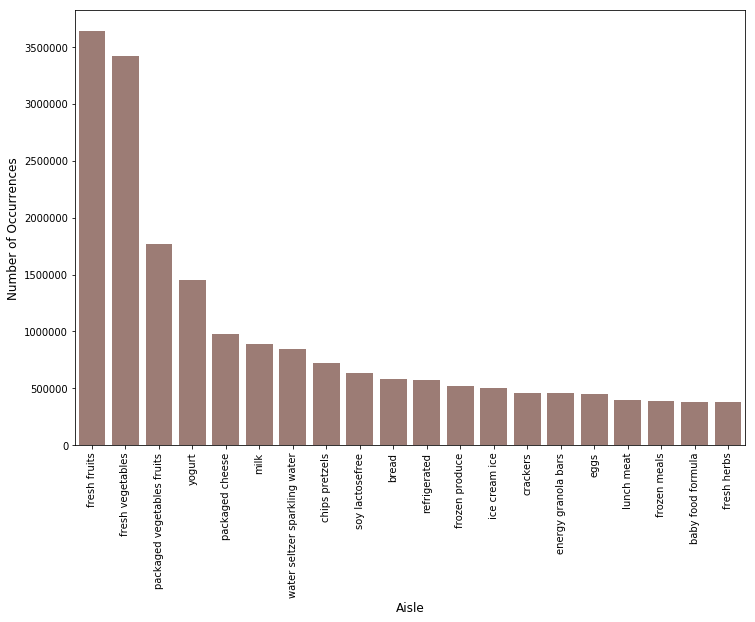

In [16]:
cnt_ais = prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_ais.index, cnt_ais.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top two aisles are fresh fruits and fresh vegetables.

**Department Distribution:**

Let us now check the department wise distribution.

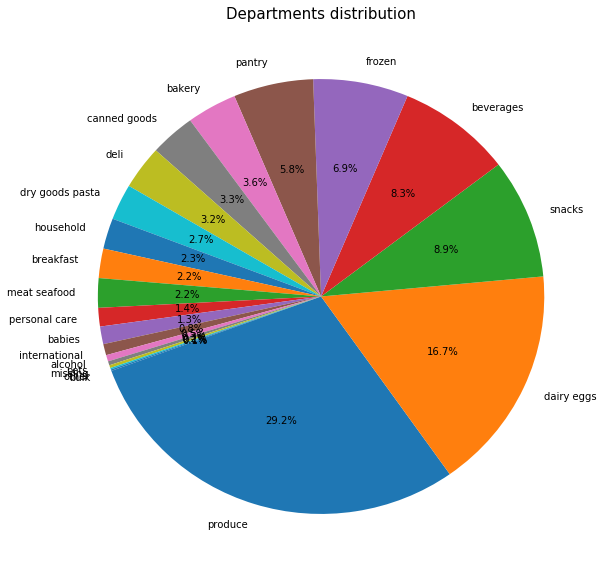

In [18]:
plt.figure(figsize=(10,10))
temp_series = prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

# **Recency, Frequency, Monetary**

In [3]:
prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")

In [4]:
print(prior.columns, orders.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [5]:
alls = pd.merge(orders,prior, on=['order_id','order_id'])
alls.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [6]:
alls['Total'] = alls['order_number'] * alls['add_to_cart_order']
cols = ['eval_set', 'order_dow',
       'order_hour_of_day','product_id','add_to_cart_order','order_number']

In [7]:
alls.drop(cols,axis =1)
alls.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Total
0,2539329,1,prior,1,2,8,NaN,196,1,0,1
1,2539329,1,prior,1,2,8,NaN,14084,2,0,2
2,2539329,1,prior,1,2,8,NaN,12427,3,0,3
3,2539329,1,prior,1,2,8,NaN,26088,4,0,4
4,2539329,1,prior,1,2,8,NaN,26405,5,0,5


In [8]:
users_churn = alls[alls.reordered == 0]
user_remain = alls[alls.reordered != 0]

In [9]:
RFMtable = user_remain.rename(columns = {'Total': 'Monetary',
                  'days_since_prior_order': 'Recency',
                 'reordered': 'Frequency'},inplace = True)

In [10]:
RFMtable = user_remain.groupby('user_id').agg({'Recency': lambda x: x.max(),
                                              'Frequency': lambda x: len(x),
                                              'Monetary': lambda x: x.sum()})
RFMtable.head()

,Recency,Frequency,Monetary
user_id,,,
1,30.0,41,930
2,30.0,93,6265
3,21.0,55,1489
4,21.0,1,18
5,19.0,14,247


In [11]:
quantiles = RFMtable.quantile(q=[0.25,0.5,0.75])
quantiles.head()

,Recency,Frequency,Monetary
0.25,22.0,11.0,163.0
0.50,30.0,34.0,1006.0
0.75,30.0,103.0,6702.0


In [12]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 11.0, 0.5: 34.0, 0.75: 103.0},
 'Monetary': {0.25: 163.0, 0.5: 1006.0, 0.75: 6702.0},
 'Recency': {0.25: 22.0, 0.5: 30.0, 0.75: 30.0}}

In [13]:
# create the RFM segmentation table

RFMSegmentation = RFMtable

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [14]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [15]:
RFMSegmentation['R_Quantile'] = RFMSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
RFMSegmentation['F_Quantile'] = RFMSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
RFMSegmentation['M_Quantile'] = RFMSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [16]:
RFMSegmentation['RFMClass'] = RFMSegmentation.R_Quantile.map(str) \
                            + RFMSegmentation.F_Quantile.map(str) \
                            + RFMSegmentation.M_Quantile.map(str)
RFMSegmentation.head()

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFMClass
user_id,,,,,,,
1,30.0,41,930,2,2,3,223
2,30.0,93,6265,2,2,2,222
3,21.0,55,1489,1,2,2,122
4,21.0,1,18,1,4,4,144
5,19.0,14,247,1,3,3,133


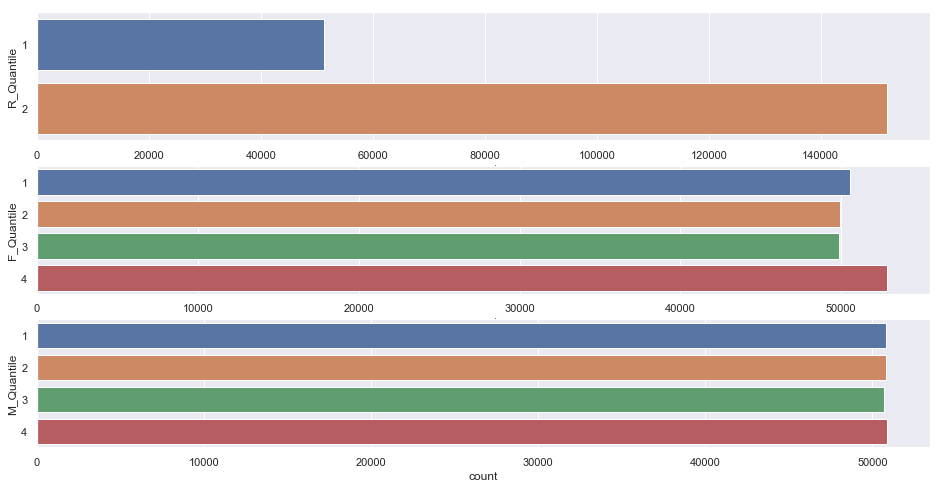

In [17]:
sns.set_palette('Paired')
sns.set(rc={'image.cmap': 'coolwarm'})

fig,axes = plt.subplots(3,1,figsize = (16,8))
sns.countplot(y = RFMSegmentation.R_Quantile,ax = axes[0])
sns.countplot(y = RFMSegmentation.F_Quantile,ax = axes[1])
sns.countplot(y = RFMSegmentation.M_Quantile,ax = axes[2])

1.The number of higher recency users is fewer than that of lower recency user, which is acceptable and make sense .

2.The number of lower frequency users is the most, acceptable and make sense . Other three clusters are quite similar, it shows the supermarket managed its customer very well.

3.The Monetary value distribution is quite similar.

In [18]:
# let us see the best customers
RFMSegmentation[RFMSegmentation['RFMClass']=='111'].sort_values('Monetary', ascending=False).head(5)

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFMClass
user_id,,,,,,,
129928,19.0,3167,4509830,1,1,1,111
201268,11.0,3275,3698280,1,1,1,111
176478,10.0,2429,2996188,1,1,1,111
164055,5.0,2657,2645233,1,1,1,111
137629,18.0,2619,2441342,1,1,1,111


In [19]:
# let us also see good loyalty but spend less money customers
RFMSegmentation[RFMSegmentation['RFMClass']=='134'].sort_values('Monetary', ascending= True).head(5)

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFMClass
user_id,,,,,,,
69686,12.0,12,78,1,3,4,134
33847,21.0,12,81,1,3,4,134
78411,7.0,12,81,1,3,4,134
195723,10.0,12,81,1,3,4,134
29572,22.0,12,81,1,3,4,134


1.Both groups of user are high loyalty because the R_quantile is 1, which means they always come back 
and buy somthing in a not quite long period.

2.However, loyalty does not means money or profit. 
We can see clearly that the Monetary value of the two groups are quite different!

3.The more you know your customers, the better you can serve them.

In [20]:
import sys
from itertools import combinations, groupby # Combination without replacements
from collections import Counter
from IPython.display import display # To display the entire output

In [21]:
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [22]:
# Load the dataset
orders = pd.read_csv('order_products__prior.csv')
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
display(orders.head())

orders -- dimensions: (32434489, 4);   size: 1037.90 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = orders.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [24]:
# Summary statics of dataset

print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))

dimensions: (32434489,);   size: 518.95 MB;   unique_orders: 3214874;   unique_items: 49677


In [25]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq") # Gives freq of each product_id

In [26]:
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))

In [27]:
# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

In [28]:
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

In [29]:
# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [30]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq") # Converting to dataframe
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index  # only items with min_supp we are storing
    order_item             = order_item[order_item.isin(qualifying_items)] 

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))

    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)
                                                        
                                                         

In [31]:
%%time
rules = association_rules(orders, 0.01)

Starting order_item:               32434489
Items with support >= 0.01:           10906
Remaining order_item:              29843570
Remaining orders with 2+ items:     3013325
Remaining order_item:              29662716
Item pairs:                        30622410
Item pairs with support >= 0.01:      48751

Wall time: 9min 42s


In [32]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
11,Baby Food Pouch - Roasted Carrot Spinach & Beans,"Baby Food Pouch - Butternut Squash, Carrot & C...",332,0.011018,1503,0.049878,1290,0.042810,0.220892,0.257364,5.159830
12,Unsweetened Whole Milk Mixed Berry Greek Yogurt,Unsweetened Whole Milk Blueberry Greek Yogurt,438,0.014535,1622,0.053828,1621,0.053794,0.270037,0.270204,5.019798
23,Uncured Cracked Pepper Beef,Chipotle Beef & Pork Realstick,410,0.013606,1839,0.061029,1370,0.045465,0.222947,0.299270,4.903741
24,Organic Mango Yogurt,Organic Whole Milk Washington Black Cherry Yogurt,334,0.011084,1675,0.055586,1390,0.046128,0.199403,0.240288,4.322777
2,Grain Free Chicken Formula Cat Food,Grain Free Turkey & Salmon Formula Cat Food,391,0.012976,1809,0.060033,1553,0.051538,0.216142,0.251771,4.193848


Item pairs are having positive relationship, recommendations can be made to customers in order to increase sales.

And we can also introduce customers to items that they have never tried before or even imagined existed.

In [35]:
type(rules_final)

pandas.core.frame.DataFrame

In [38]:
rules_final.columns

Index(['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB',
       'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift'],
      dtype='object')

In [39]:
rules_final.shape

(48751, 11)